In [10]:
import pandas as pd
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# 데이터 불러오기
data=pd.read_csv("C:/Users/HCJ/Desktop/2021_Summer/Finance_data/bank.csv")

# 데이터 전처리
Y=data[['TARGET']]
X=data.drop(['Unnamed: 0','TARGET'],axis=1)

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=1004)

# 데이터 샘플링

X_undersampled, Y_undersampled = RandomUnderSampler(random_state=0).fit_resample(X_train,Y_train)
X_smote, Y_smote = SMOTE(random_state=0).fit_resample(X_train,Y_train)
X_ada, Y_ada = ADASYN(random_state=0).fit_resample(X_train,Y_train)


In [14]:
def roc_curve_plot1(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC1')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
def roc_curve_plot2(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC2')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
def roc_curve_plot3(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label = 'ROC3')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
def precision_recall_curve_plot(y_test, pred_proba_cl):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_cl)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

def get_eval(y_test,pred=None):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    precision2=precision_score(y_test,pred,pos_label=0)
    recall2=recall_score(y_test,pred,pos_label=0)
    f1_2=f1_score(y_test,pred,pos_label=0)
    print("confusion matrix")
    print(confusion)
    print('accuracy : {0:.4f} , precision : {1:.4f} , recall : {2:.4f}, F1 score : {3:.4f} \n precision(0) : {4:.4f} , recall(0) : {5:.4f}, f1(0) : {6:.4f}'.format(accuracy,precision, recall,f1,precision2,recall2,f1_2))

In [4]:
# DT 모델 형성 및 결과
# undersampling
DT1 = DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25)
DT1.fit(X_undersampled,Y_undersampled)
y_pred1=DT1.predict(X_test)
print("Undersampling DT")
get_eval(Y_test,y_pred1)
print("\n")

# Smote
DT2=DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25)
DT2.fit(X_smote,Y_smote)
y_pred2=DT2.predict(X_test)

print("Smote DT")
get_eval(Y_test,y_pred2)
print("\n")

# Adasyn
DT3=DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25)
DT3.fit(X_ada,Y_ada)
y_pred3=DT3.predict(X_test)

print("Adasyn DT")
get_eval(Y_test,y_pred3)
print("\n")

Undersampling DT
confusion matrix
[[31107  4501]
 [   42   211]]
accuracy : 0.8733 , precision : 0.0448 , recall : 0.8340, F1 score : 0.0850 
 precision(0) : 0.9987 , recall(0) : 0.8736, f1(0) : 0.9319


Smote DT
confusion matrix
[[26675  8933]
 [   38   215]]
accuracy : 0.7498 , precision : 0.0235 , recall : 0.8498, F1 score : 0.0457 
 precision(0) : 0.9986 , recall(0) : 0.7491, f1(0) : 0.8561


Adasyn DT
confusion matrix
[[28812  6796]
 [   40   213]]
accuracy : 0.8094 , precision : 0.0304 , recall : 0.8419, F1 score : 0.0587 
 precision(0) : 0.9986 , recall(0) : 0.8091, f1(0) : 0.8939




In [24]:
predict_prob_class1=DT1.predict_proba(X_test)[:,1]
predict_prob_class2=DT2.predict_proba(X_test)[:,1]
predict_prob_class3=DT3.predict_proba(X_test)[:,1]

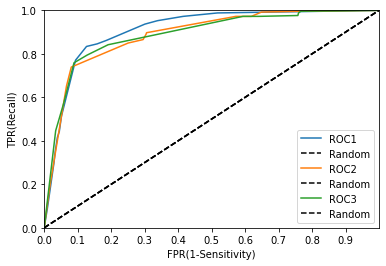

In [17]:
roc_curve_plot1(Y_test, predict_prob_class1)
roc_curve_plot2(Y_test, predict_prob_class2)
roc_curve_plot3(Y_test, predict_prob_class3)

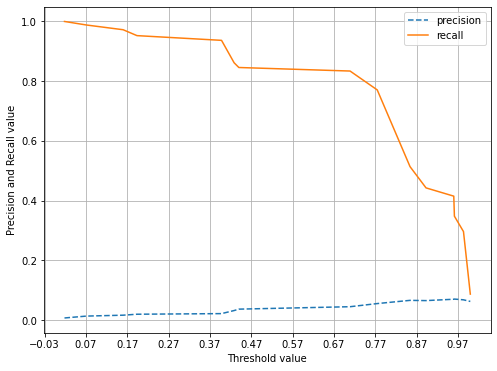

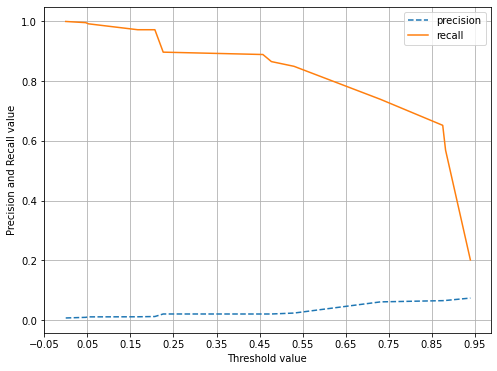

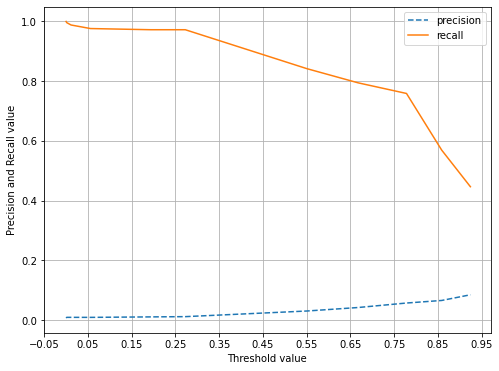

In [25]:
precision_recall_curve_plot(Y_test, predict_prob_class1)
precision_recall_curve_plot(Y_test, predict_prob_class2)
precision_recall_curve_plot(Y_test, predict_prob_class3)

In [5]:
# NB 모델 형성 및 결과
# undersamling
multiNB1=MultinomialNB()
multiNB1.fit(X_undersampled,Y_undersampled)
y_pred4=multiNB1.predict(X_test)

print("Undersampling NB")
get_eval(Y_test,y_pred4)
print("\n")

# Smote
multiNB2=MultinomialNB()
multiNB2.fit(X_smote,Y_smote)
y_pred5=multiNB2.predict(X_test)

print("Smote NB")
get_eval(Y_test,y_pred5)
print("\n")

# Adasyn
multiNB3=MultinomialNB()
multiNB3.fit(X_ada,Y_ada)
y_pred6=multiNB3.predict(X_test)

print("Adasyn NB")
get_eval(Y_test,y_pred6)
print("\n")

Undersampling NB


C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


confusion matrix
[[22679 12929]
 [  111   142]]
accuracy : 0.6364 , precision : 0.0109 , recall : 0.5613, F1 score : 0.0213 
 precision(0) : 0.9951 , recall(0) : 0.6369, f1(0) : 0.7767


Smote NB
confusion matrix
[[25629  9979]
 [  106   147]]
accuracy : 0.7188 , precision : 0.0145 , recall : 0.5810, F1 score : 0.0283 
 precision(0) : 0.9959 , recall(0) : 0.7198, f1(0) : 0.8356


Adasyn NB


C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


confusion matrix
[[27290  8318]
 [   82   171]]
accuracy : 0.7658 , precision : 0.0201 , recall : 0.6759, F1 score : 0.0391 
 precision(0) : 0.9970 , recall(0) : 0.7664, f1(0) : 0.8666




In [18]:
predict_prob_class1=multiNB1.predict_proba(X_test)[:,1]
predict_prob_class2=multiNB2.predict_proba(X_test)[:,1]
predict_prob_class3=multiNB3.predict_proba(X_test)[:,1]

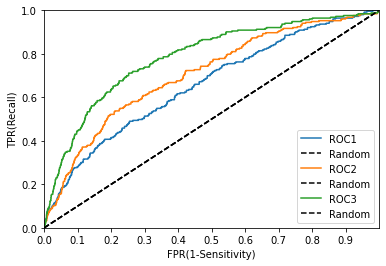

In [19]:
roc_curve_plot1(Y_test, predict_prob_class1)
roc_curve_plot2(Y_test, predict_prob_class2)
roc_curve_plot3(Y_test, predict_prob_class3)

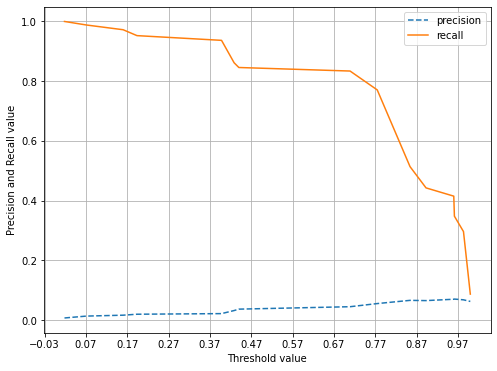

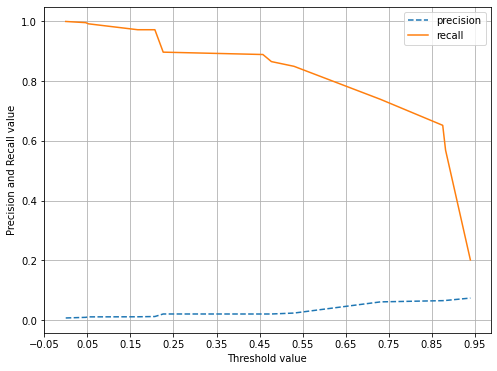

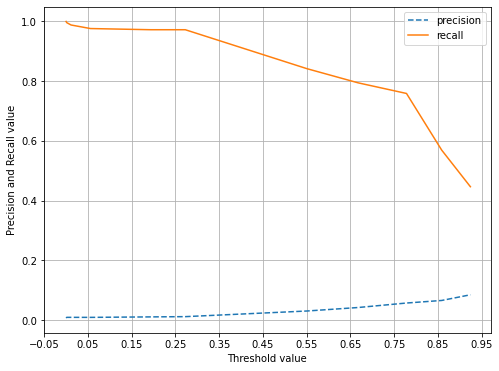

In [26]:
precision_recall_curve_plot(Y_test, predict_prob_class1)
precision_recall_curve_plot(Y_test, predict_prob_class2)
precision_recall_curve_plot(Y_test, predict_prob_class3)

In [6]:
# Categorical NB
# undersamling
CateNB1=CategoricalNB()
CateNB1.fit(X_undersampled,Y_undersampled)
y_pred10=CateNB1.predict(X_test)

print("Undersampling CateNB")
get_eval(Y_test,y_pred10)
print("\n")

# Smote
CateNB2=CategoricalNB()
CateNB2.fit(X_smote,Y_smote)
y_pred11=CateNB2.predict(X_test)

print("Smote CateNB")
get_eval(Y_test,y_pred11)
print("\n")

# Adasyn
CateNB3=CategoricalNB()
CateNB3.fit(X_ada,Y_ada)
y_pred12=CateNB1.predict(X_test)

print("Adasyn CateNB")
get_eval(Y_test,y_pred12)
print("\n")



Undersampling CateNB
confusion matrix

C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



[[27539  8069]
 [  110   143]]
accuracy : 0.7719 , precision : 0.0174 , recall : 0.5652, F1 score : 0.0338 
 precision(0) : 0.9960 , recall(0) : 0.7734, f1(0) : 0.8707




C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Smote CateNB
confusion matrix
[[26951  8657]
 [   96   157]]
accuracy : 0.7559 , precision : 0.0178 , recall : 0.6206, F1 score : 0.0346 
 precision(0) : 0.9965 , recall(0) : 0.7569, f1(0) : 0.8603




C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Adasyn CateNB
confusion matrix
[[27539  8069]
 [  110   143]]
accuracy : 0.7719 , precision : 0.0174 , recall : 0.5652, F1 score : 0.0338 
 precision(0) : 0.9960 , recall(0) : 0.7734, f1(0) : 0.8707




In [20]:
predict_prob_class1=CateNB1.predict_proba(X_test)[:,1]
predict_prob_class2=CateNB2.predict_proba(X_test)[:,1]
predict_prob_class3=CateNB3.predict_proba(X_test)[:,1]

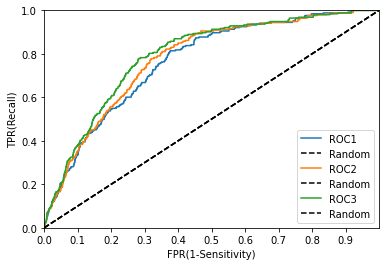

In [21]:
roc_curve_plot1(Y_test, predict_prob_class1)
roc_curve_plot2(Y_test, predict_prob_class2)
roc_curve_plot3(Y_test, predict_prob_class3)

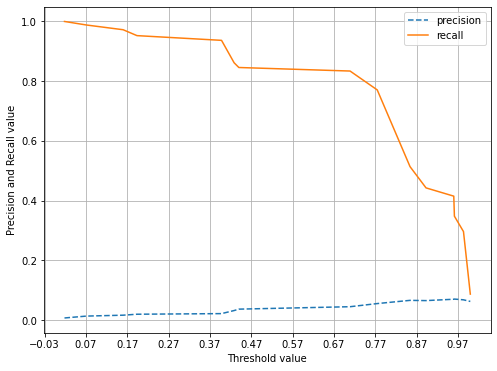

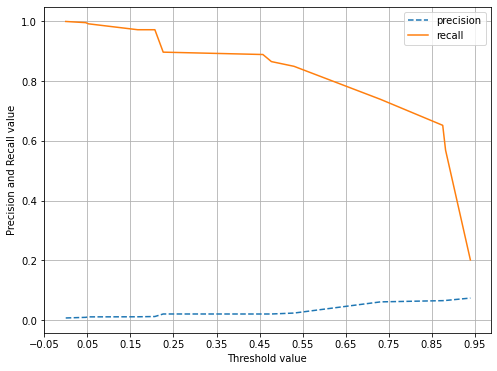

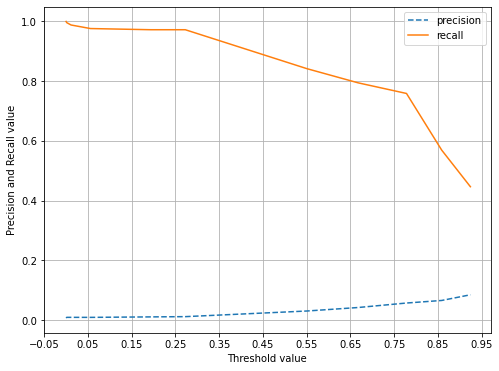

In [27]:
precision_recall_curve_plot(Y_test, predict_prob_class1)
precision_recall_curve_plot(Y_test, predict_prob_class2)
precision_recall_curve_plot(Y_test, predict_prob_class3)

In [7]:
# logistic 모델 형성 및 결과
# optimization
'''
Y = data[['TARGET']]
X = data.drop(['TARGET'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1004
X = MinMaxScaler().fit_transform(X) 
# 뭔가 이상함. 테스트데이터 스플릿 이전에 optimization 해야하는 것 같은데 스플릿 이후에 optimization 하는게 필요없는 코드 같음
'''
# under sampling
Logi1 = LogisticRegression()
Logi1.fit(X_undersampled, Y_undersampled)
y_pred7 = Logi1.predict(X_test)

print("Undersampling Logi")
get_eval(Y_test,y_pred10)
print("\n")

# Smote
Logi2 = LogisticRegression()
Logi2.fit(X_smote, Y_smote)
y_pred8 = Logi2.predict(X_test)

print("Smote Logi")
get_eval(Y_test,y_pred11)
print("\n")

# Adasyn
Logi3 = LogisticRegression()
Logi3.fit(X_ada, Y_ada)
y_pred9 = Logi3.predict(X_test)

print("Adasyn Logi")
get_eval(Y_test,y_pred12)
print("\n")

Undersampling Logi


C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confusion matrix
[[27539  8069]
 [  110   143]]
accuracy : 0.7719 , precision : 0.0174 , recall : 0.5652, F1 score : 0.0338 
 precision(0) : 0.9960 , recall(0) : 0.7734, f1(0) : 0.8707




C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Smote Logi
confusion matrix
[[26951  8657]
 [   96   157]]
accuracy : 0.7559 , precision : 0.0178 , recall : 0.6206, F1 score : 0.0346 
 precision(0) : 0.9965 , recall(0) : 0.7569, f1(0) : 0.8603




C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Adasyn Logi
confusion matrix
[[27539  8069]
 [  110   143]]
accuracy : 0.7719 , precision : 0.0174 , recall : 0.5652, F1 score : 0.0338 
 precision(0) : 0.9960 , recall(0) : 0.7734, f1(0) : 0.8707




C:\Users\HCJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
predict_prob_class1=Logi1.predict_proba(X_test)[:,1]
predict_prob_class2=Logi2.predict_proba(X_test)[:,1]
predict_prob_class3=Logi3.predict_proba(X_test)[:,1]

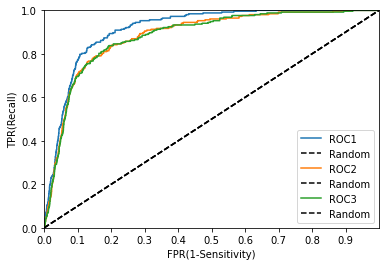

In [23]:
roc_curve_plot1(Y_test, predict_prob_class1)
roc_curve_plot2(Y_test, predict_prob_class2)
roc_curve_plot3(Y_test, predict_prob_class3)

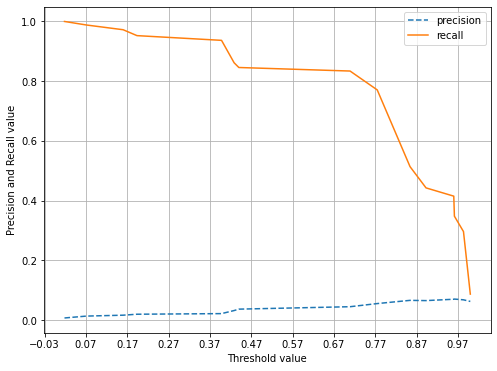

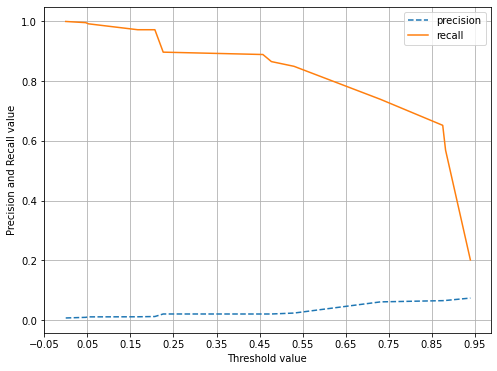

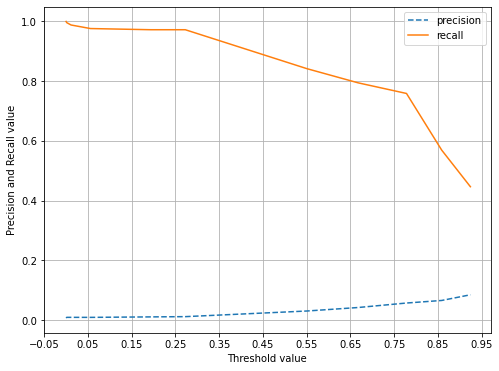

In [28]:
precision_recall_curve_plot(Y_test, predict_prob_class1)
precision_recall_curve_plot(Y_test, predict_prob_class2)
precision_recall_curve_plot(Y_test, predict_prob_class3)